In [1]:
!pip install nltk matplotlib wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.9 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.1/520.1 kB 50.1 MB/s eta 0:00:00


In [25]:
!pip install textblob spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 118.8 MB/s eta 0:00:001m160.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.6 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.3/494.3 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━

In [61]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.0 MB/s eta 0:00:008.6 MB/s eta 0:00:01


In [31]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 132.6 MB/s eta 0:00:00m eta 0:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.3 MB/s eta 0:00:00m eta 0:00:010:01:01


In [71]:
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
from nltk import bigrams
from gensim import corpora, models

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/cs585bp/gitika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/cs585bp/gitika/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
def preprocess_text(text):
    # basic preprocessing
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

In [43]:
# word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {title}')
    plt.show()

In [55]:
# word freq bar chart
def generate_word_frequency_bar_chart(tokens, title):
    fdist = FreqDist(tokens)
    most_common = fdist.most_common(30)
    words, frequencies = zip(*most_common)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Word Frequency - {title}')
    plt.show()


In [45]:
# Sentiment Analysis
def perform_sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [46]:
# named entity recognition (NER)
def perform_ner(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

In [59]:
# Bigram freq
def generate_bigram_bar_chart(tokens, title):
    bigram_tokens = list(bigrams(tokens))
    fdist_bigram = FreqDist(bigram_tokens)
    most_common_bigram = fdist_bigram.most_common(30)
    bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigram]

    plt.figure(figsize=(12, 6))
    plt.bar(bigram_labels, [count for _, count in most_common_bigram])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bigram Frequency - {title}')
    plt.show()

In [47]:
# LDA - Topic modeling
def perform_lda(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    
    lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)
    
    topics = lda_model.print_topics()
    return topics

In [65]:
import os


speeches_folder = './project_data/gpt2-outputs'

def read_speeches(folder_path):
    speeches_list = []
    speech_names = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            speech_path = os.path.join(folder_path, file_name)
            with open(speech_path, 'r', encoding='utf-8') as file:
                speech_text = file.read()
                speeches_list.append(speech_text)
                speech_names.append(file_name.split('.')[0])  # Assuming file names are identifiers

    return speeches_list, speech_names

speeches_list, speech_names = read_speeches(speeches_folder)


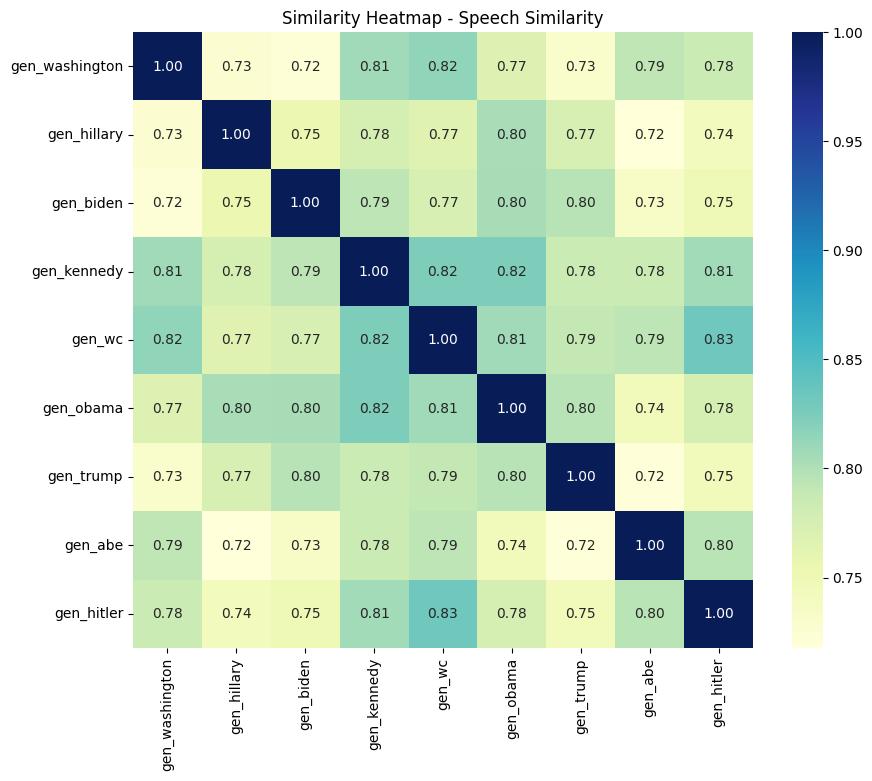

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(speeches_list)
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# similarity heatmap
def generate_similarity_heatmap(cosine_similarities, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_similarities, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=speech_names, yticklabels=speech_names)
    plt.title(f'Similarity Heatmap - {title}')
    plt.show()

generate_similarity_heatmap(cosine_similarities, 'Speech Similarity')


In [68]:
def analyze_political_figure(file_path, president_name):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Preprocessing
    preprocessed_text = preprocess_text(text)
    tokens = word_tokenize(preprocessed_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # word cloud
    generate_word_cloud(preprocessed_text, president_name)

    # word and bigram frequency bar chart
    # print(f"Tokens for {president_name}: {tokens}")
    generate_word_frequency_bar_chart(tokens, president_name)
    generate_bigram_bar_chart(tokens, president_name)
    

    # Sentiment analysis
    sentiment = perform_sentiment_analysis(preprocessed_text)
    if sentiment >= 0:
        print(f"Sentiment for {president_name}: Positive : {sentiment:.2f}")
    else:
        print(f"Sentiment for {president_name}: Negative : {sentiment:.2f}")

    print()

    # Named Entity Recognition (NER)
    entities = perform_ner(text)
    print(f"Named Entities for {president_name}: {entities}")

    print()

    # Topic modeling using LDA
    topics = perform_lda(preprocessed_text)
    print(f"Topics for {president_name}:")
    for topic in topics:
        print(topic)

In [57]:
output_folder = './project_data/gpt2-outputs/'

generated_files = os.listdir(output_folder)

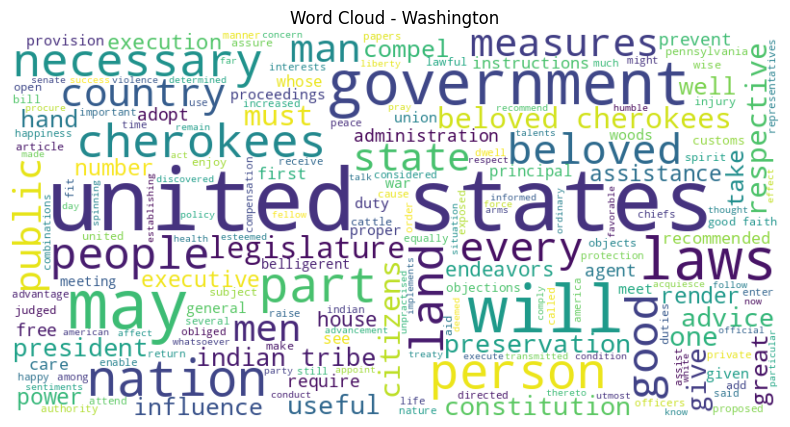

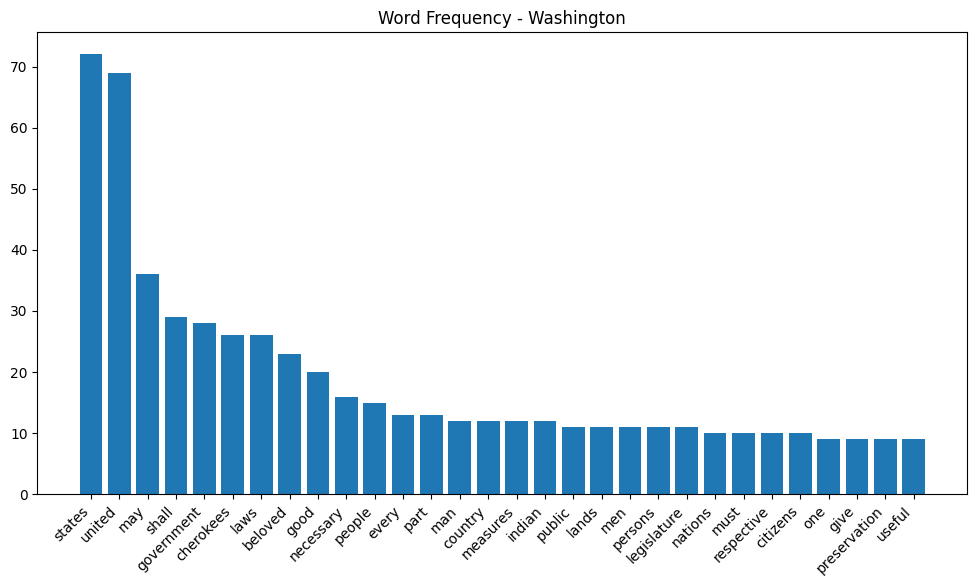

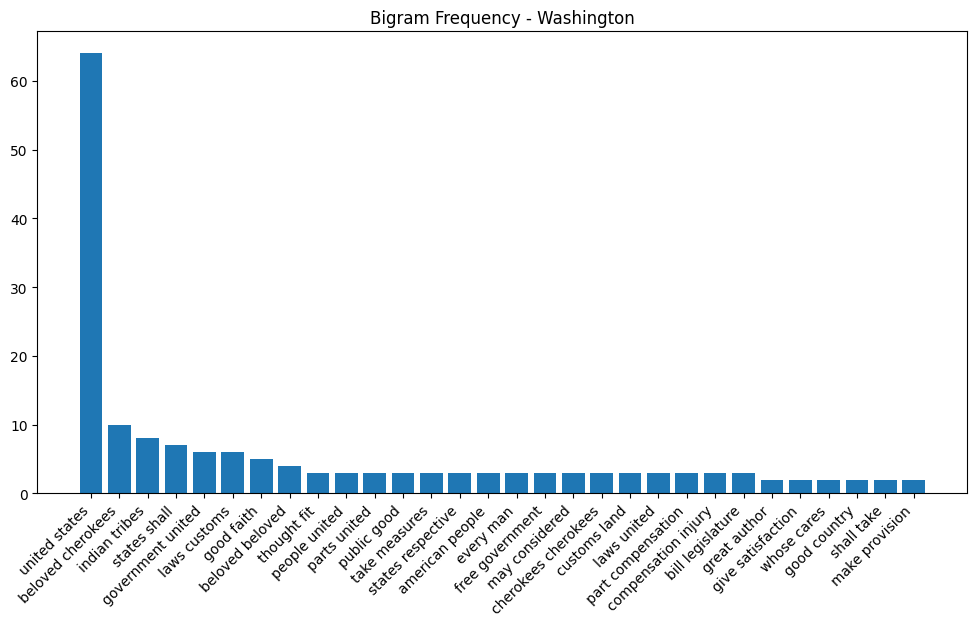

Sentiment for Washington: 0.22
Named Entities for Washington: ['The Great Author\n\nHaving', 'Cherokees', 'Country', 'House', 'the United States', 'the United States', 'the United States', 'the United States', 'Pennsylvania', 'this United States', 'the United States', 'the United States', 'Country', 'the United States', 'the United States', 'the United States', 'the United United States', 'one', 'Beloved Cherokees', 'The Great War', 'States', 'Governments of the United States', 'the United States', 'Constitution', 'the United States', 'States', 'Philadelphia', 'the United States', 'the United States of America', 'Senate', 'House of Representatives', 'the Executive Department', 'the United States', 'the United Nations', 'the United Nations;Having', 'the United Nations', 'Senate', 'the United States of America', 'States', 'Cherokees', 'Indian', 'first', 'the United States', 'first', 'the White House', 'the Great Author of this Government', 'American', 'this United States', 'American', 'E

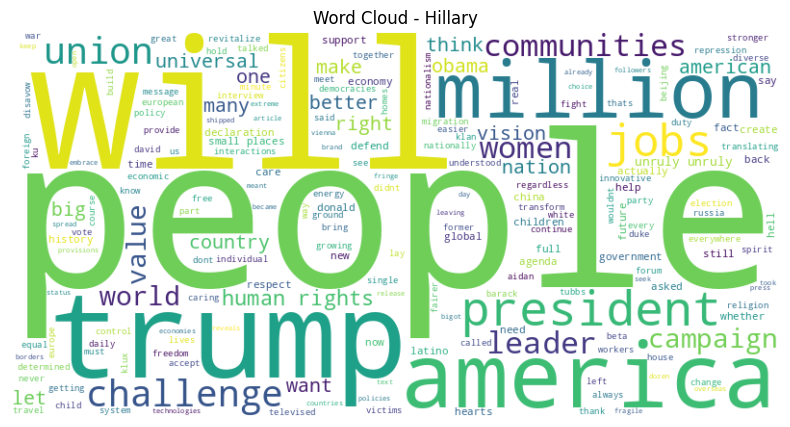

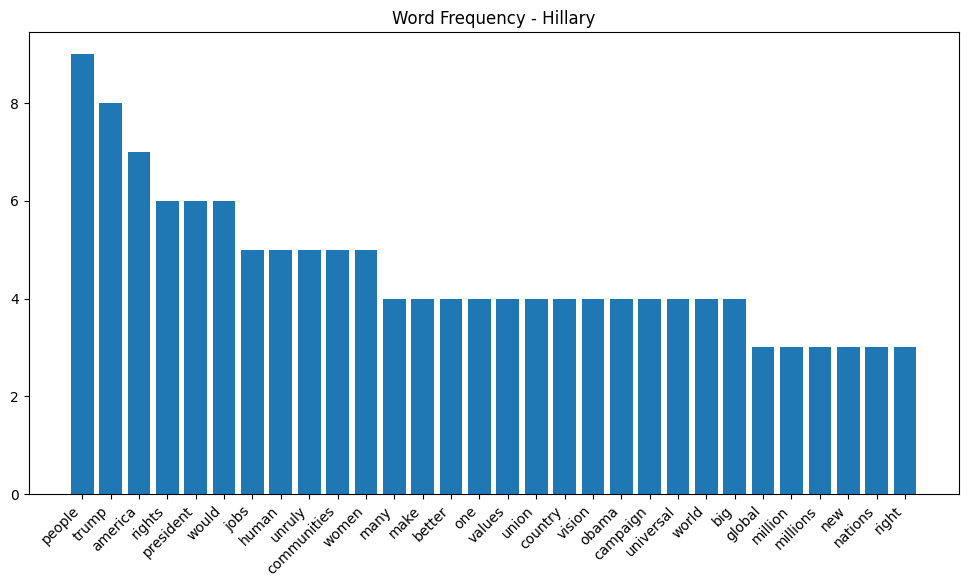

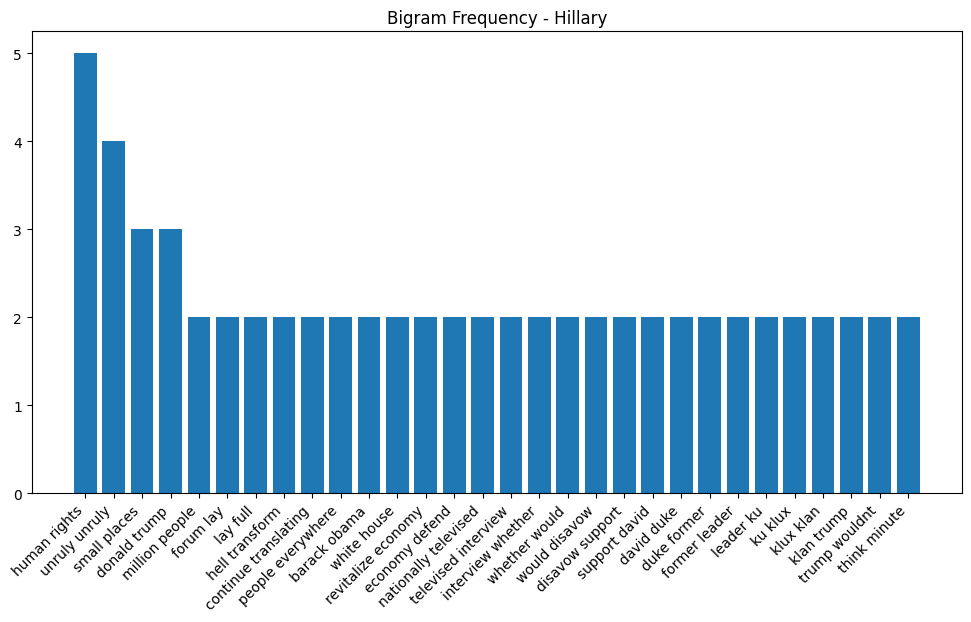

Sentiment for Hillary: 0.14
Named Entities for Hillary: ['Trump', 'a few dozen', '11 million', "The European Union's", 'millions', 'the Vienna Declaration', 'Article 7', 'America', 'every day', 'Americans', 'Sandy Hook', 'Washington, D.C', 'unruly', 'unruly', 'unruly', 'millions', 'American', 'Barack Obama', 'the White House', 'Trump', 'one', 'David Duke', 'the Ku Klux Klan', 'Trump', 'a minute', 'a minute', '2015', 'Trump', 'America', 'Donald Trump', 'the Republican Party', 'the Party of Lincoln', 'Russian', 'Xinjiang Province', 'Chinese', "'The Great Firewall of China", '2008', '9/11', 'Oklahoma City', 'Donald Trump', 'Latino', 'Michelle Obama', 'New Jersey', 'Just yesterday', 'Obama', 'anti-Muslim', '11 million', '11 million', 'one', 'daily', 'Beijing', 'Moscow', 'Helsinki', 'Latino', 'Beijing', 'China', 'Turkey', 'Dr', 'Barack Obama', 'Kamala Harris', 'Americans', 'Stephanie Tubbs', 'Katie Ledecky', 'Rebecca Blackfield', 'Charlotte', 'Aidan', 'Aidan', 'Mervyn Tubbs', 'the Universal

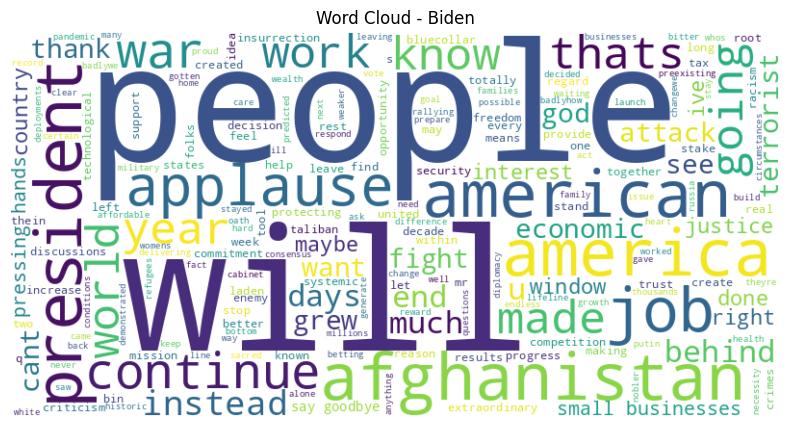

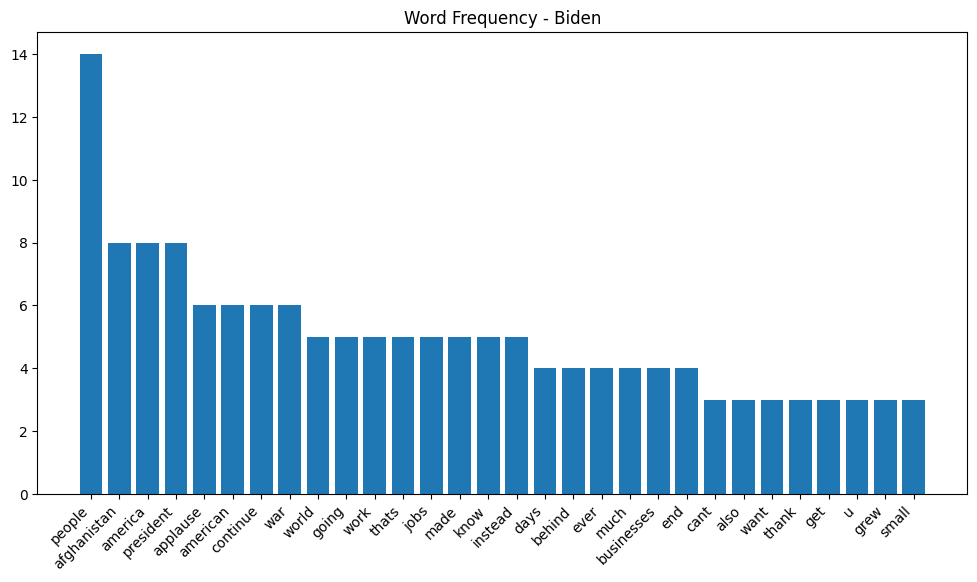

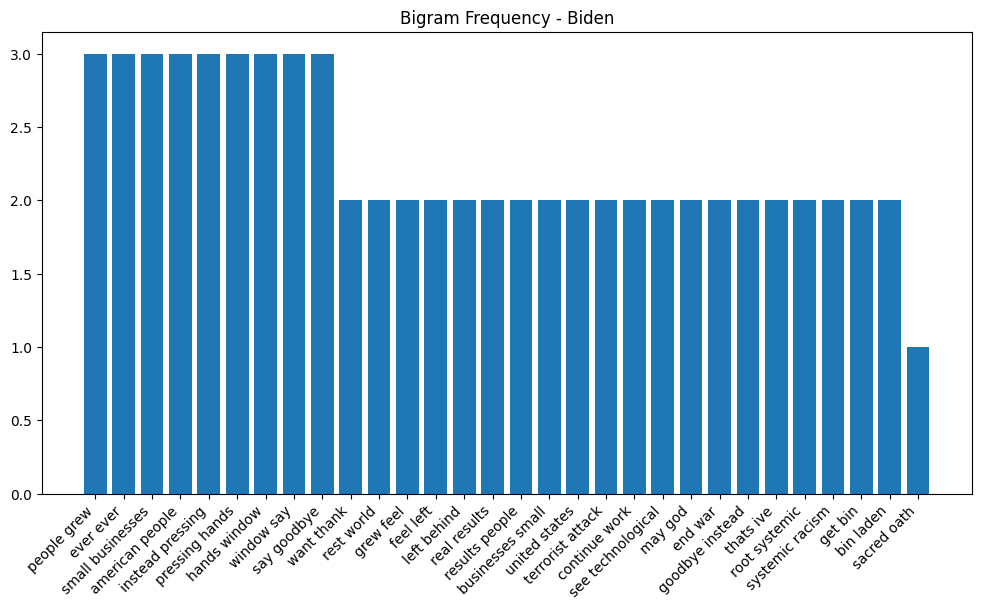

Sentiment for Biden: 0.07
Named Entities for Biden: ['millions', 'Americans', 'Cabinet', 'Afghanistan', 'American', 'America', 'America', 'an extraordinary year', 'America', 'Afghanistan', 'a decade', 'Afghanistan', 'Putin', 'Afghanistan', 'Russia', 'the United States', 'thousands', 'Afghanistan', 'America', 'America', 'the next 10 years', 'God', 'Xi', 'the United States', 'the Joint Chiefs of Staff', 'Afghans', 'American', 'the coming days', 'Russians', 'Afghanistan', 'Taliban', 'Congress', 'ISIS-K', 'maybe years', 'America', '100', 'seconds', 'Democrat', 'Republican', 'America', 'This week', 'Afghanistan', 'American', 'Americans', 'American', 'two', 'Get bin Laden', 'bin Laden', 'a minute', 'fourth', 'the Paris Accord', 'the International Monetary Fund', 'American', 'Taliban', 'today', 'Pentagon', 'weeks', '20-year', 'Afghanistan', 'the past two decades', 'American', 'America']
Topics for Biden:
(0, '0.016*"people" + 0.009*"president" + 0.009*"afghanistan" + 0.009*"america" + 0.008*"

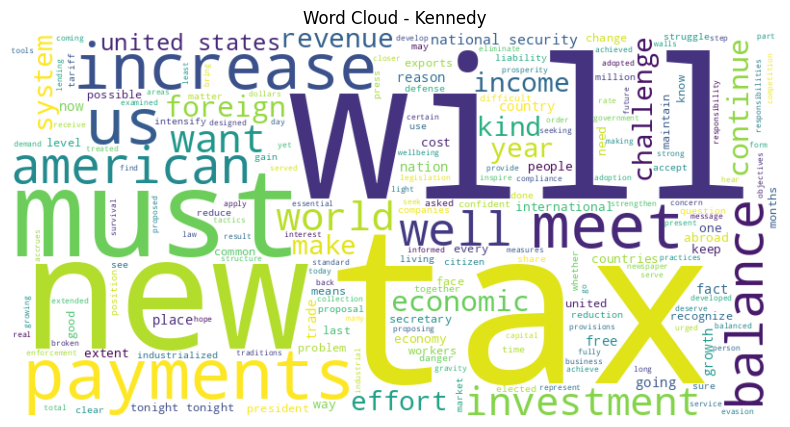

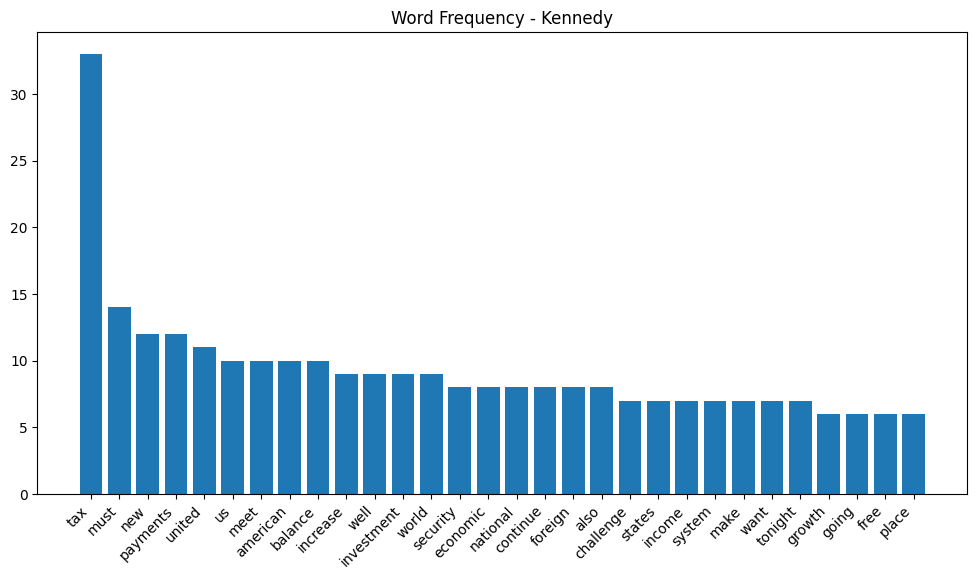

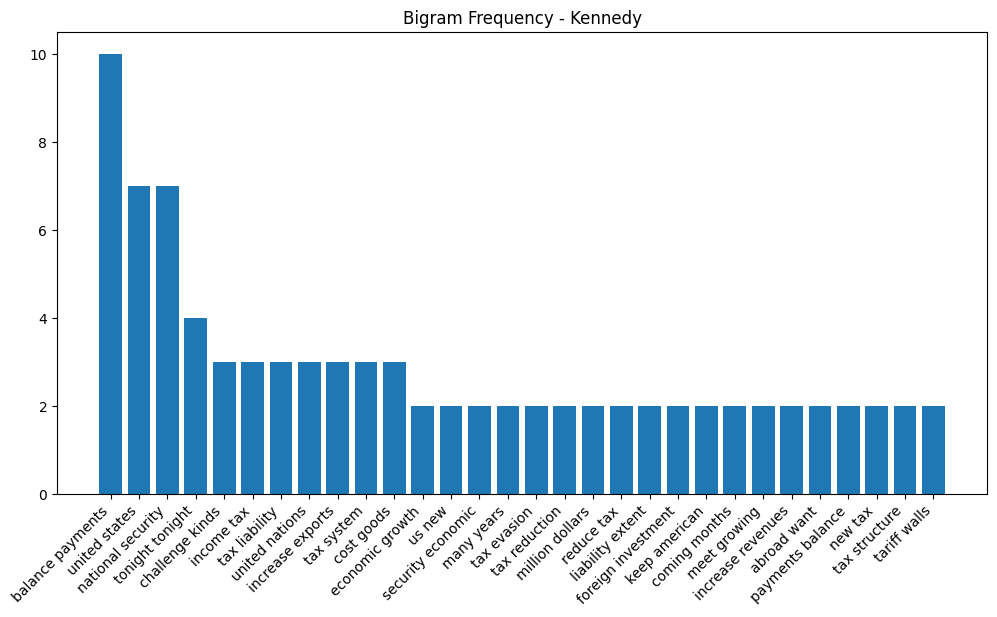

Sentiment for Kennedy: 0.13
Named Entities for Kennedy: ['the United States', 'New York', 'more than $20,000', 'many years', '$5 million', 'this year', 'the last year', '$5 million dollars', 'three-year', 'the first 5 months', 'the tax year', '1%', 'five million dollars', 'the United Nations', 'Eisenhower', 'Congress', 'the United States', '1961', 'the end of the day', 'American', 'three', 'the United States', 'American', 'the coming months and months', 'American', 'tonight', 'tonight', 'tonight', 'tonight', 'tonight', 'one', 'United', '50%', 'only one', 'State', 'Treasury', 'the United States', 'two', 'Federal Service', 'House', 'Third', 'American', 'the United Nations', 'the coming months', 'the United States', 'today', 'the United States', 'Ways and Means Committee', '20', 'Atlantic', '20-', 'American', 'the United States', 'January 1,000', '5,000', 'many years', 'One', 'Defense', 'United Nations', 'Trade Agreements', 'American', 'American', 'the European Free World', 'Administratio

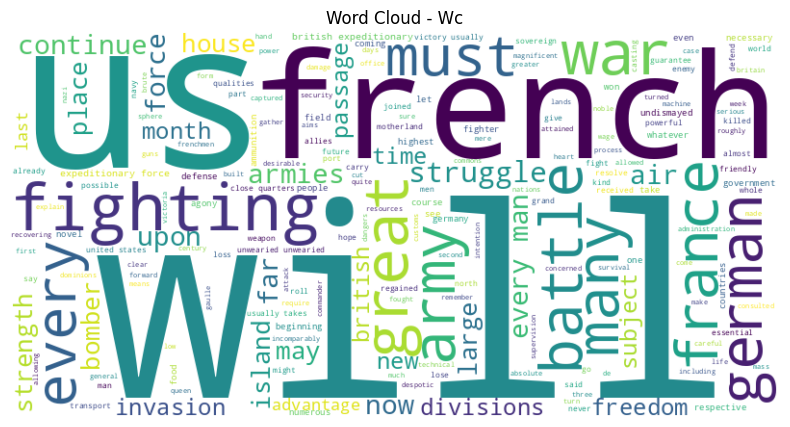

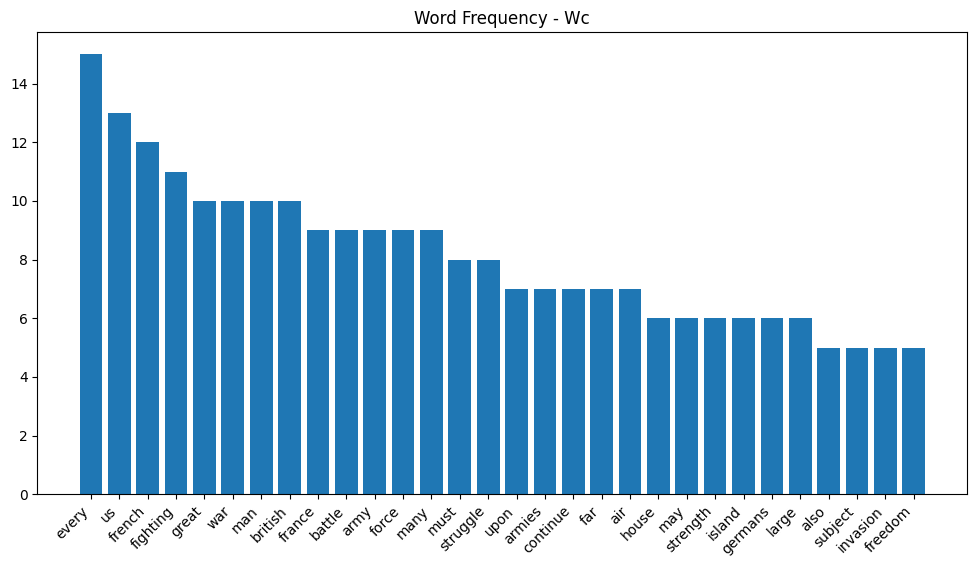

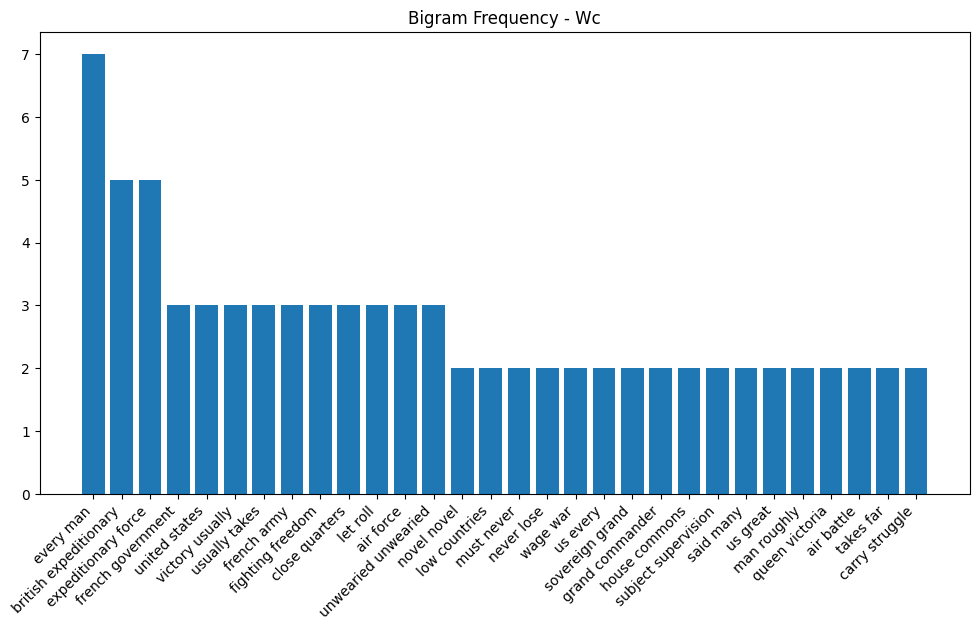

Sentiment for Wc: 0.12
Named Entities for Wc: ['House', 'the second week of May', 'second', 'German', 'France', 'Passchendaele', 'the month of July', 'the New Zealand First Army', 'nearly three weeks', 'The King of all Belgians', 'Sovereign', 'the British Expeditionary Force', 'Sovereign', 'Island', 'the House of Commons', 'Island', 'Britain', 'Europe', 'the French Government', 'Navy', 'the first 12 months', 'Motherland', 'British', 'Motherland', 'Governments', 'Colonies', 'today', 'the United States', 'The French Government', 'French', 'Gestapo', 'the Board of Trade', 'tomorrow', 'afternoon', 'Queen Victoria', 'South Africa', 'Great Britain', 'France', 'Nazi', 'House', 'Sovereign', 'the French Army', 'States', 'the United States', 'one', 'Hitler', 'Mussolini', 'French', 'Germans', 'Jews', 'the French Army', 'close quarters', 'Amiens de Gaulle', 'France', 'Sedan', 'The Admiralty', 'Germans', 'the House of Commons', 'tonight', 'British', 'the German Army', 'Germany', 'the 21st century',

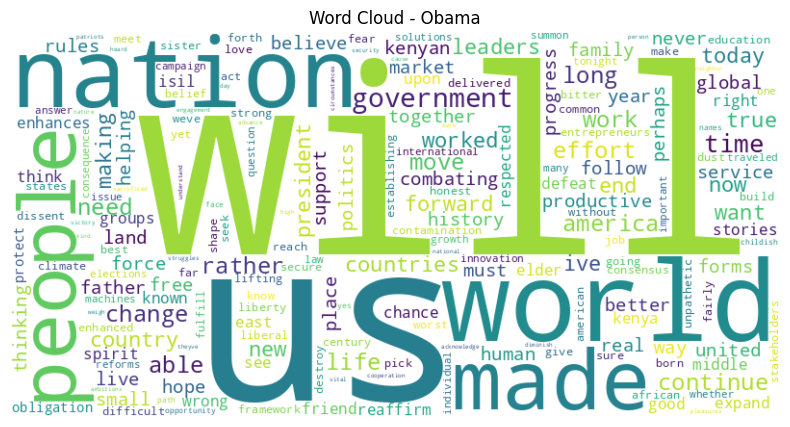

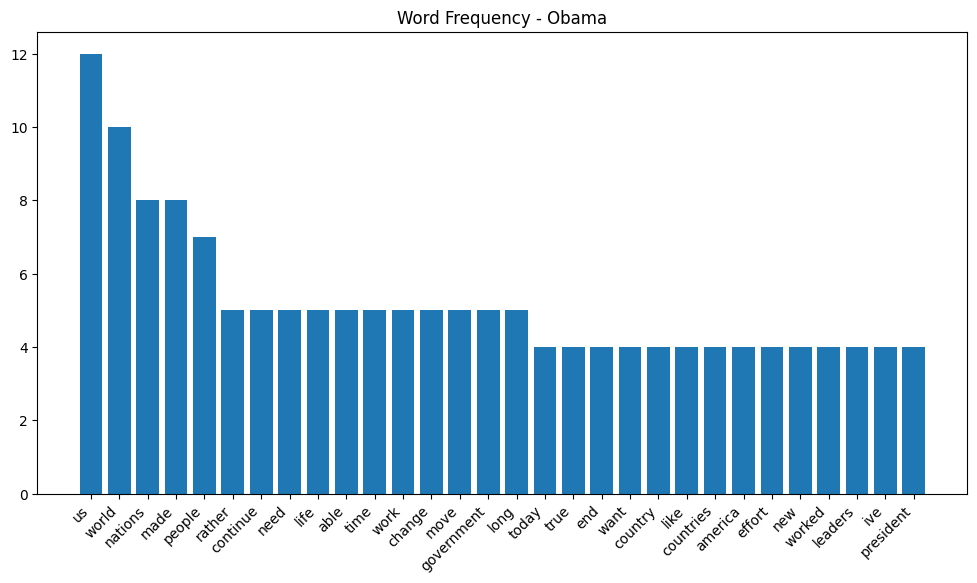

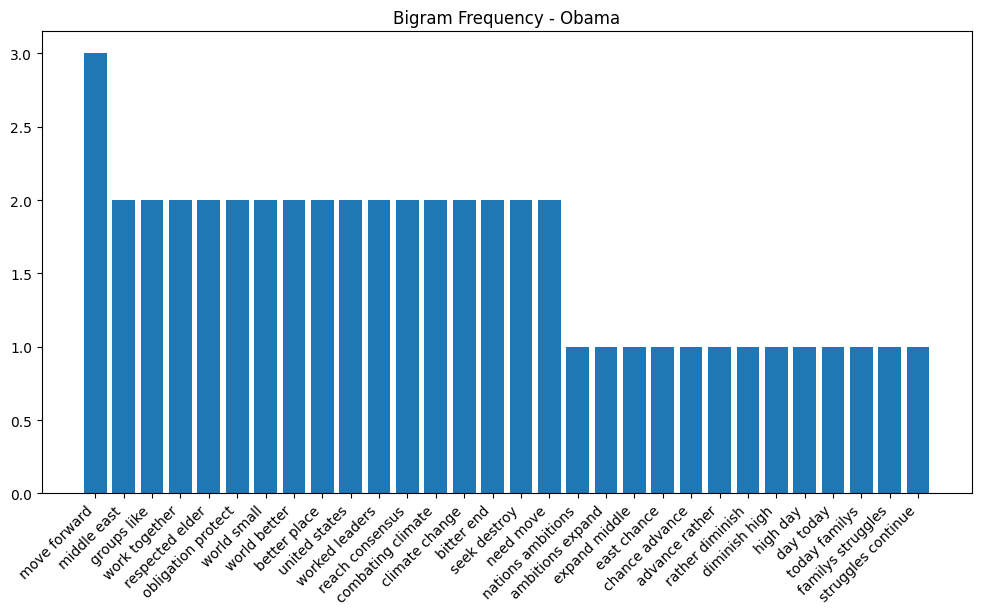

Sentiment for Obama: 0.18
Named Entities for Obama: ['the Middle East', 'this day', 'today', 'ISIL', 'Njau', 'Kenyans', 'Kenya', 'Cuba', 'American', 'this century', 'United States of America', 'America', 'Ukraine', 'Europe', 'Soviet', 'the United States', 'Forty', 'today', 'Sasha', 'Kenyan', 'the Middle East', 'Africa', 'African', 'today', 'America', 'Michelle Obama', 'the White House', 'this year', 'America', 'America', 'Americans', 'the Democratic Party', 'tonight', 'tonight', 'Bush', 'Joe Biden', 'the United Nations', 'Martin Luther King', 'centuries', 'more than two', 'one year', 'ISIL', 'today', 'Nairobi', 'Kenya', 'Kenyan', 'al Qaeda', 'Islamic', 'African', 'this century']
Topics for Obama:
(0, '0.012*"us" + 0.008*"world" + 0.007*"nations" + 0.007*"people" + 0.006*"made" + 0.005*"time" + 0.005*"change" + 0.005*"life" + 0.005*"continue" + 0.005*"government"')
(1, '0.009*"us" + 0.009*"world" + 0.007*"made" + 0.006*"nations" + 0.005*"people" + 0.005*"rather" + 0.005*"change" + 0.005

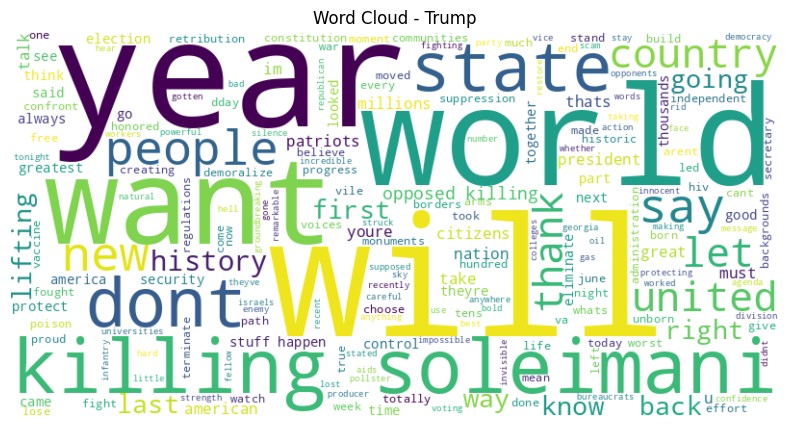

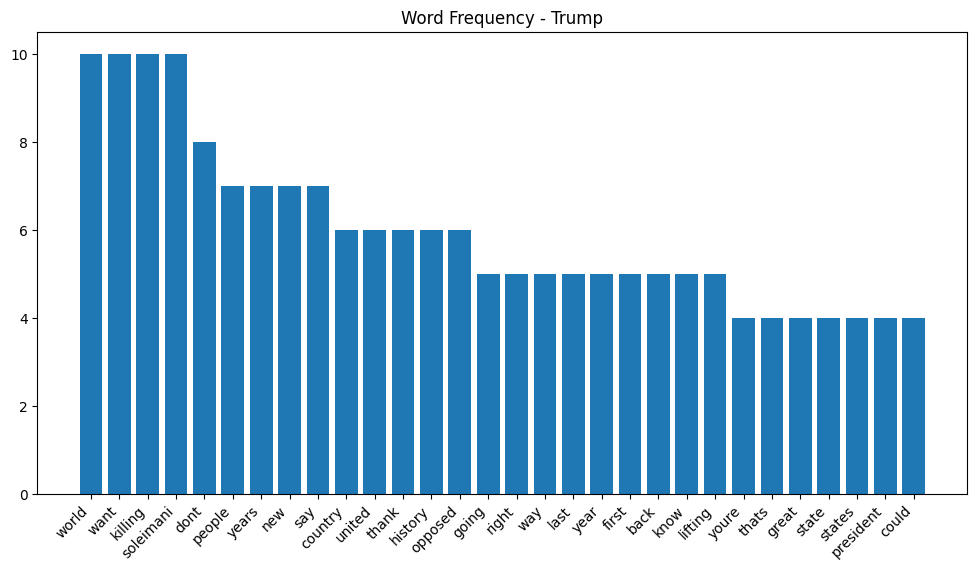

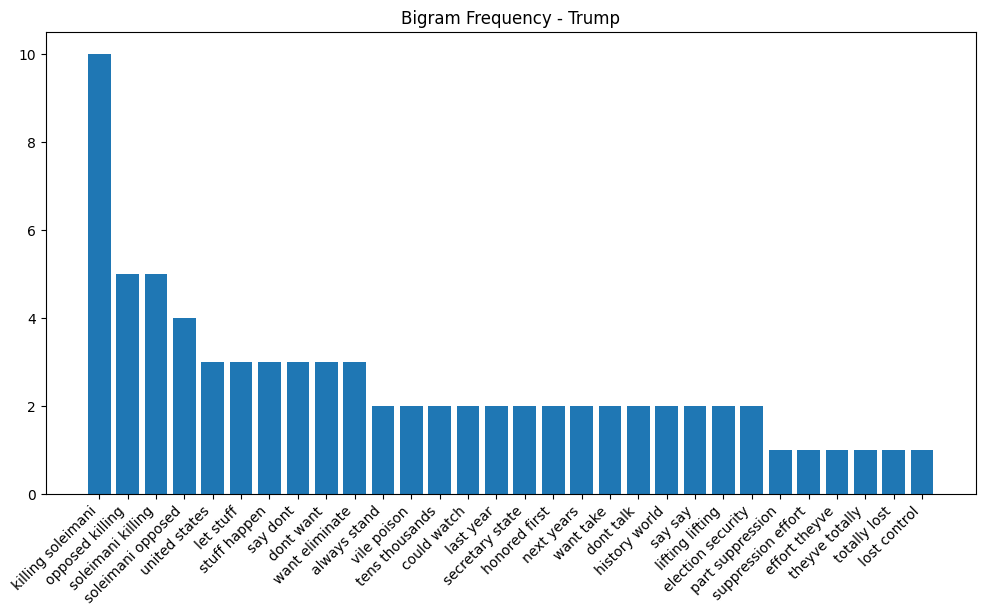

Sentiment for Trump: 0.18
Named Entities for Trump: ['Constitution', '100%', 'recent years', 'the United States', 'The United States', 'one', 'Israel', 'tens of thousands', 'Last year', 'tonight', 'Georgia', 'Republican Party', 'this year', 'first Infantry', 'first', 'the next 10 years', 'June', 'Alice', 'Medicare', 'Social Security', 'Constitution', 'the next 22 years', 'first', 'June', 'Stephanie', '92-year-old', 'Marian Wynn', 'California', 'Don', 'American', 'American', 'the next four years', 'One', 'fourth', 'VIRUS', 'British', 'Dunkirk', 'the London Blitz', 'Israeli', 'the Golan Heights', 'this month', 'first', 'Middle East', '25 years', 'tens of thousands', '2,000', 'America', 'DEFEND', 'America', 'millions', 'China', 'millions', 'millions', 'millions', 'the last night', 'the Iraq War', 'Osama bin Laden', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'Soleimani', 'the United States', 'today', 'the end of the 

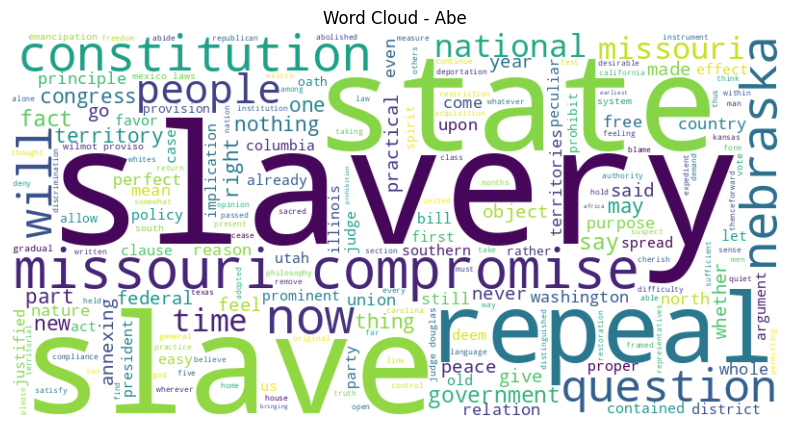

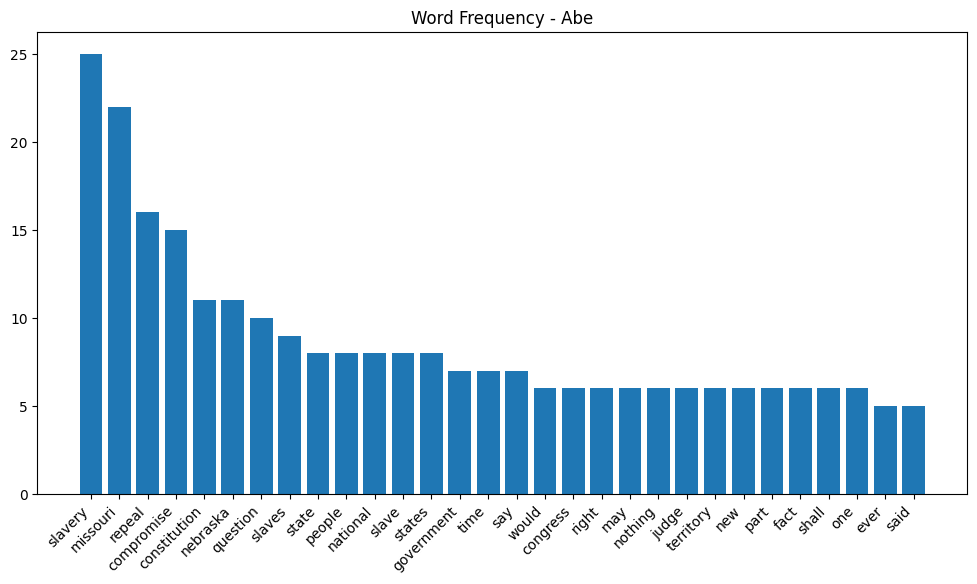

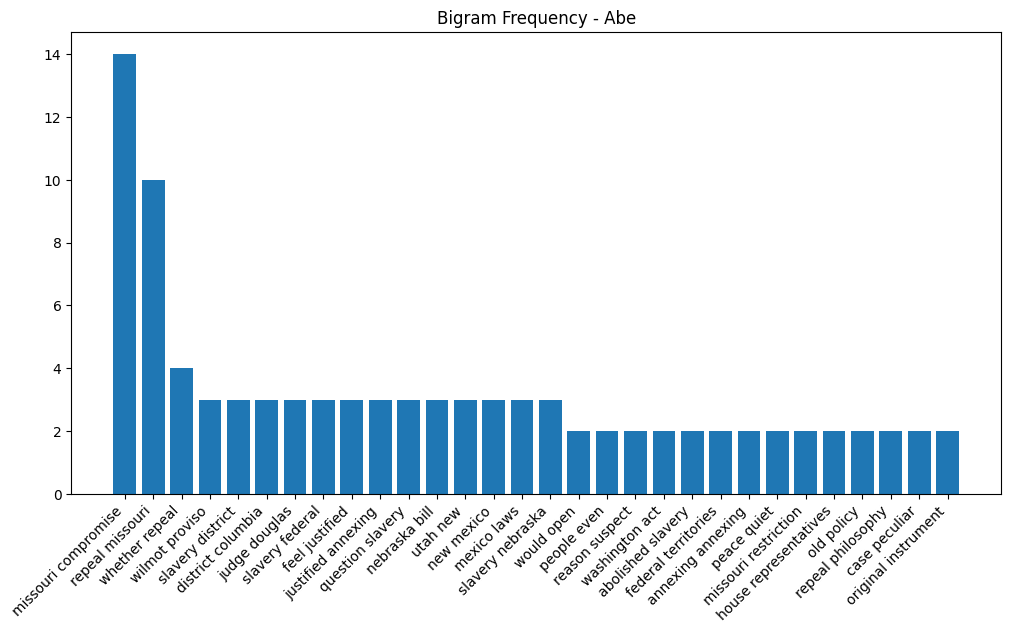

Sentiment for Abe: 0.16
Named Entities for Abe: ['Africa', 'Congress', '1798', 'the "Wilmot Proviso', 'the State of California', 'Nebraska', '1803', 'Congress', 'Constitution', 'Union', 'Louisiana', 'Washington', 'the District of Columbia', '1852', 'Douglas', 'Court', 'Constitution', 'States', 'State', 'Congress', 'Constitution', 'Republicans', 'Missouri', 'two hundred and fifty year-old', 'half', 'Kansas', 'Illinois', 'Missouri', 'African', 'the House of Representatives', 'Constitution', 'the Missouri Compromise', 'Thenceforward', 'French', 'North', 'Douglas', 'Washington', 'the Missouri Compromise', 'Missouri', "Harper's Ferry", 'Missouri', 'several months', 'Missouri', 'Nebraska', 'the Declaration of Independence', 'the Missouri Compromise', 'Missourians', 'Utah', 'New Mexico', 'State', 'Utah', 'New Mexico', 'Missouri', 'Congress', 'Texas', 'Nebraska', 'Missouri', 'Nebraska', 'Nebraska', '1798', 'two years', 'first', 'Mexico', 'Thenceforward', 'House of Representatives', 'Missouri',

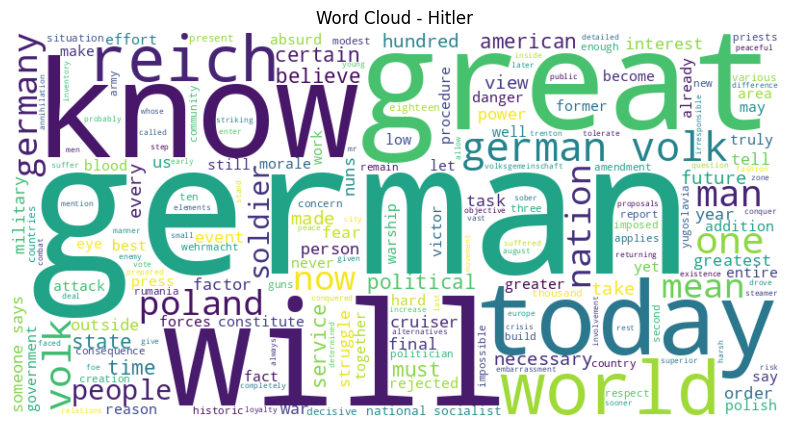

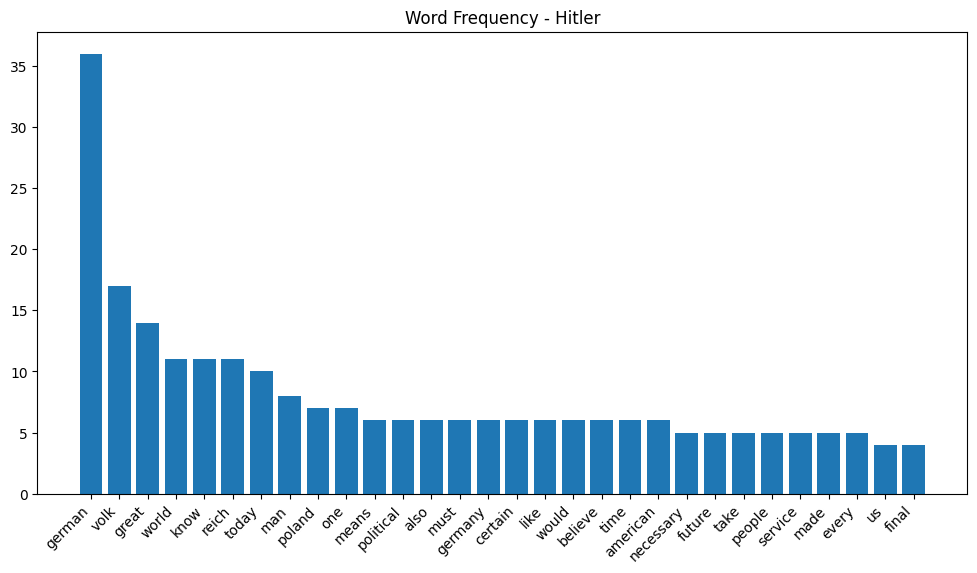

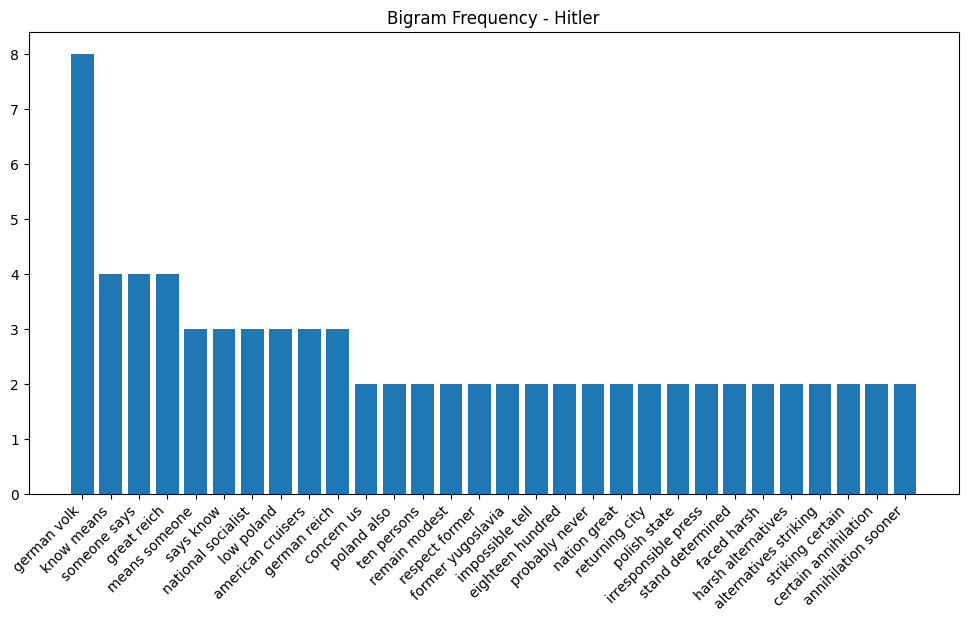

Sentiment for Hitler: 0.11
Named Entities for Hitler: ['German', 'Volk', 'Poland', 'Romans', 'Court', 'first', 'second', 'ten', 'only ten', 'German', 'Army', 'Wehrmacht', 'April 15', 'Germany', 'Rumania', 'Yugoslavia', 'America', 'hundreds of thousands', 'German', 'thirty-two thousand three hundred seventy-four', 'eighteen hundred forty-eight  fourteen', 'eighteen hundred and eight hundred seventy-one', 'Volk', 'Volksgemeinschaft', 'Volk', 'Reich', 'Germans', 'today', 'this year', 'Polish', 'Japan', 'Volk', 'one', 'the League of Nations', 'Polish', 'Washington', 'German', 'German', 'Reich', 'Reich', 'Jewish', 'Volk', 'the National Socialist Volksgemeinschaft', 'National Socialist', 'German', 'Volk', 'German', 'Volksgenossen', 'today', 'Volk', 'the German Volk’s', 'Today', 'no more than three', '1', 'German', 'Poland', 'Russian', 'Yugoslavia', 'today', 'Poland', 'Poland', 'German', 'Poland', 'German', 'the German Army', '1', 'August 19', 'American', 'German', 'Odenwald', 'German', 'no G

In [72]:
for file_name in generated_files:
    if file_name.startswith('gen_') and file_name.endswith('.txt'):
        president_name = file_name.split('_')[1].split('.')[0].capitalize()
        file_path = os.path.join(output_folder, file_name)
        analyze_political_figure(file_path, president_name)
        